# Reading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
survey_raw_df = pd.read_csv('survey_results_public.csv')

In [5]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


The dataset contains 64,461 responses to 60 questions. The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondent ID.

Let's look at the list of columns in the data frame.

In [14]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

It appears thay are shortcodes for survey questions. I will refer to the schema file to see the full text of each question. The schema file contains only two columns: `Column` and `QuestionText`. 

In [4]:
schema_fname = 'survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

In [8]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

Now we can use `schema_raw` to retrieve the survey question for any column in `survey_raw_df`.

In [9]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

# Data Preparation & Cleaning

While the survey responses contain a wealth of information, I will limit the analysis to the following areas:

- Demographics of the survey respondents and the global programming community.
- Distribution of programming skills, experience, and preferences.
- Employment-related information, preferences, and opinions.

First, let's select a subset of columns with the relevant data for our analysis.

In [5]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [11]:
len(selected_columns)

20

Let's extract a copy of the data from these columns into a new data frame `survey_df`. Then we can modify the data without affecting the original data frame.

In [6]:
survey_df = survey_raw_df[selected_columns].copy()

In [7]:
schema = schema_raw[selected_columns]

Let's view some basic information about the data frame.

In [17]:
survey_df.shape

(64461, 20)

In [18]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Most columns have the data type `object`, either because they contain values of different types or contain empty values (`NaN`). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (64,461). We'll need to deal with empty values and convert data type for each column on a case-by-case basis. 

Only two of the columns were detected as numeric columns (`Age` and `WorkWeekHrs`). To make this analysis easier, I will convert some other columns into numeric data types while ignoring any non-numeric value. The non-numeric are converted to `NaN`.

In [9]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

Let's have a look at the basic statistics about numeric columns.

In [20]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


It seems something wrong with the age column since the minimum value is 1 and the maximum is 279. I will use the `.drop` method to ignore the rows where the age is higher than 100 years or lower than 10 years as invalid survey responses.

In [10]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace = True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace = True)

Similarly, let's ignore entries where the value of `WorkWeekHrs` is higher than 140 hours. (~20 hours per day).

In [11]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace = True)

The gender column also allows for picking multiple options. I will remove values containing more than one option to simplify our analysis.

In [16]:
survey_df['Gender'].value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [15]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

Now the dataset is cleaned up. Let's take a look at a sample of rows from the data frame.

In [19]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
6831,India,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,20.0,7.0,4.0,JavaScript;Objective-C;Python;Swift,Perl;Ruby,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, mobile",8.0,Slightly satisfied,Flex time or a flexible schedule;Office enviro...,Sometimes: 1-2 days per month but less than we...,Fairly important
44011,Spain,28.0,Man,Primary/elementary school,NaN,Yes,6.0,10.0,5.0,C#;HTML/CSS;TypeScript,C#;Kotlin;TypeScript,Once a year,Meditate;Call a coworker or friend,Employed full-time,"Designer;Developer, back-end;Developer, front-...",39.0,Very satisfied,Flex time or a flexible schedule;Remote work o...,Never,Very important
4532,United States,39.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A social science (such as anthropology, psycho...",Yes,12.0,10.0,4.0,JavaScript,JavaScript,Once every few years,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Somewhat important
9537,France,24.0,Woman,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,16.0,8.0,3.0,C;C++;HTML/CSS;JavaScript;Python;SQL;TypeScript,Assembly;C;C++;Python;SQL;TypeScript,Every few months,Call a coworker or friend;Go for a walk or oth...,Employed full-time,Data scientist or machine learning specialist;...,40.0,Very satisfied,Industry that I’d be working in;Flex time or a...,Often: 1-2 days per week or more,Fairly important
26205,Iran,30.0,Man,"Associate degree (A.A., A.S., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,14.0,14.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Every few months,Play games;Visit Stack Overflow;Watch help / t...,"Independent contractor, freelancer, or self-em...",Data or business analyst;Database administrato...,NaN,Slightly dissatisfied,Flex time or a flexible schedule;Financial per...,Sometimes: 1-2 days per month but less than we...,Somewhat important
1045,Ukraine,16.0,Man,Primary/elementary school,NaN,Yes,15.0,NaN,NaN,Python,C++;HTML/CSS;Java;JavaScript;Python,NaN,Call a coworker or friend;Visit Stack Overflow...,Student,NaN,NaN,NaN,"Flex time or a flexible schedule;Languages, fr...",NaN,NaN
24336,Germany,27.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,14.0,13.0,3.0,C++;HTML/CSS;Java;JavaScript;Python;SQL,C++;HTML/CSS;Java;Kotlin;Swift,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Database administrator;Developer, back-end;Dev...",NaN,NaN,NaN,NaN,Somewhat important
6232,Germany,46.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,17.0,30.0,20.0,C#;HTML/CSS;JavaScript;PHP;SQL,C#;HTML/CSS;JavaScript;PHP;SQL,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Database administrator;Developer, back-end;Dev...",70.0,Slightly satisfied,Flex time or a flexible schedule;Opportunities...,Sometimes: 1-2 days per month but less than we...,Fairly important
11835,Croatia,36.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",No,20.0,3.0,2.0,Bash/Shell/PowerShell;HTML/CSS;Java;SQL,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...,Once a year,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Developer, QA or test",40.0,Slightly satisfied,Flex time or a flexible schedule;Office enviro...,Rarely: 1-2 days per year or less,Fairly important


# Exploratory Analysis and Visualization

It would be helpful to understand the respondents' demographics before exploring the dataset. By doing so, we can check how representative the survey is. 

In [22]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Demographics infomation

### County

Let's look at how many countries the survey covered and plot the top ten countries with the highest number of responses.

In [21]:
schema.Country

'Where do you live?'

In [22]:
survey_df.Country.nunique()

183

In [25]:
top_countries = survey_df.Country.value_counts().head(10)
top_countries

United States     12371
India              8364
United Kingdom     3881
Germany            3864
Canada             2175
France             1884
Brazil             1804
Netherlands        1332
Poland             1259
Australia          1199
Name: Country, dtype: int64

We can visualize this information using a bar chart.

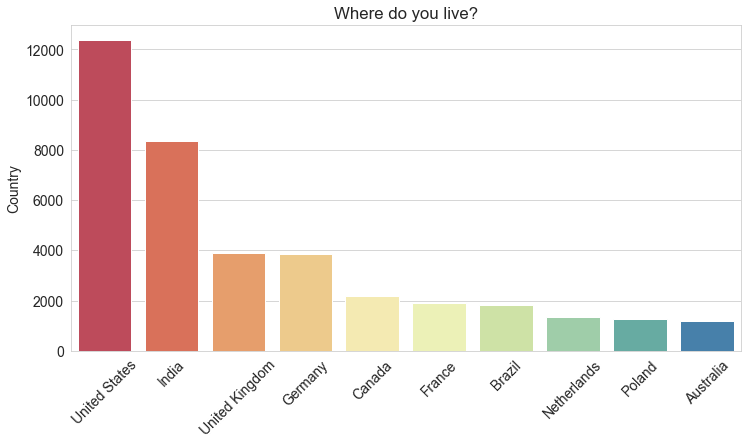

In [52]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries, palette='Spectral');

It seems that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. So, the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

### Age

The distribution of respondents' age is another crucial factor to look at. 

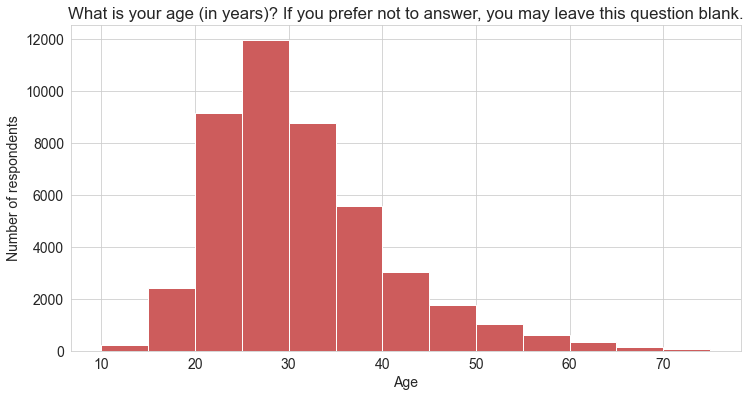

In [63]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='indianred');

It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.

### Gender

Let's look at the distribution of responses for the Gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [91]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [20]:
gender_counts = survey_df.Gender.value_counts()
gender_counts 

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

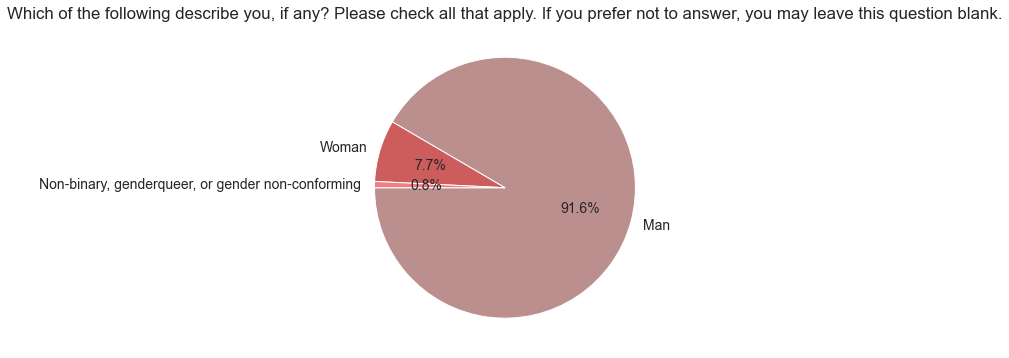

In [57]:
colors = ['rosybrown', 'indianred', 'lightcoral']

plt.figure(figsize=(12, 6))
plt.title(schema.Gender)

plt.pie(gender_counts, labels=gender_counts.index, colors=colors, autopct='%1.1f%%', startangle=180);

Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community - which is estimated to be around 12%. 

### Education level

Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. 

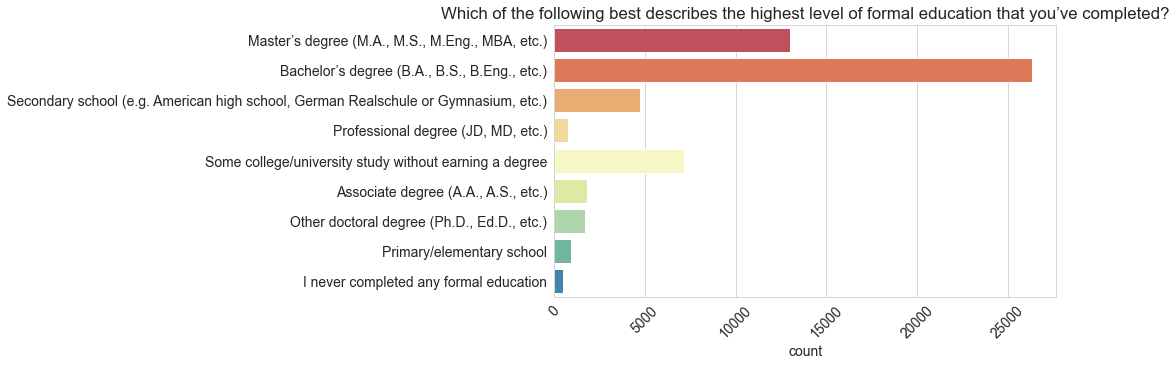

In [61]:
sns.countplot(y=survey_df.EdLevel, palette='Spectral')
plt.xticks(rotation=45);
plt.title(schema.EdLevel)
plt.ylabel(None);

It appears that well over half of the respondents hold a bachelor's or master's degree. Most programmers seem to have some college education, but it's not clear whether they hold a degree in computer science or not.

### Undergraduate major

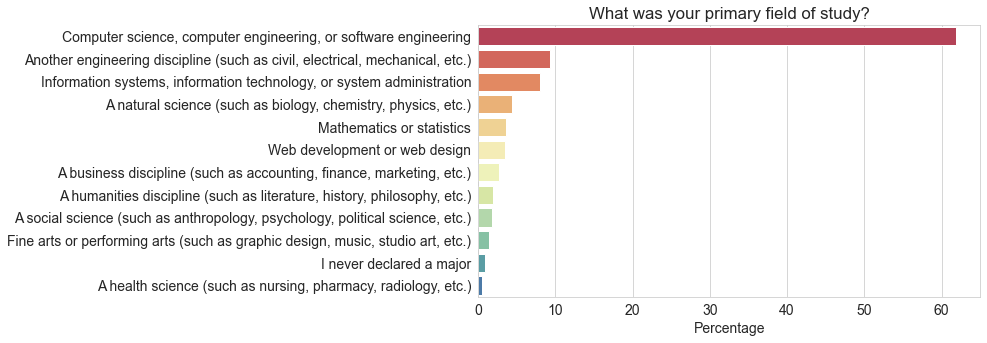

In [65]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index, palette='Spectral')

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

It turns out that 40% of programmers holding a college degree have a field of study other than computer science. It seems that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.

## Programming skills

### Most popular programming languages in 2020

The `LanguageWorkedWith` column contains information on programmming languages the respondents worked with. 

In [75]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

Since the question allows multiple answers, the column contains lists of values separated by a semi-colon `;`. I will define a helper function to turn this column into a data frame with one column for each possible option. The new data frame would have one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is `True`. Otherwise, it is `False`.

In [70]:
def split_column(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [76]:
languages_worked_df = split_column(survey_df.LanguageWorkedWith)

In [77]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


There are 25 languages included among the options. Let's aggregate these to identify the percentage of respondents who selected each language.

In [78]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

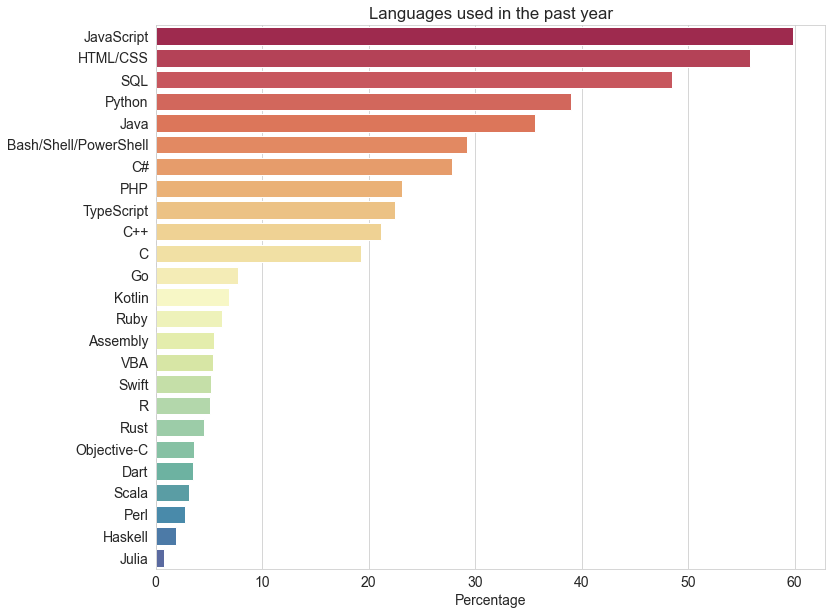

In [91]:
plt.figure(figsize=(12, 10))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index, palette='Spectral')
plt.title("Languages used in the past year");
plt.xlabel('Percentage');

As expected, Javascript & HTML/CSS comes out at the top as web development is one of the most sought skills. SQL is necessary for working with relational databases, so unsprisingly most programmers work with SQL regularly. Python seems to be the popular choice for other forms of development, beating out Java, which was the industry standard for server & application development for over two decades.

### The languages that most people interested to learn 

I will use the `LanguageDesireNextYear` column with similar processing as the previous one.

In [83]:
languages_interested_df = split_column(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

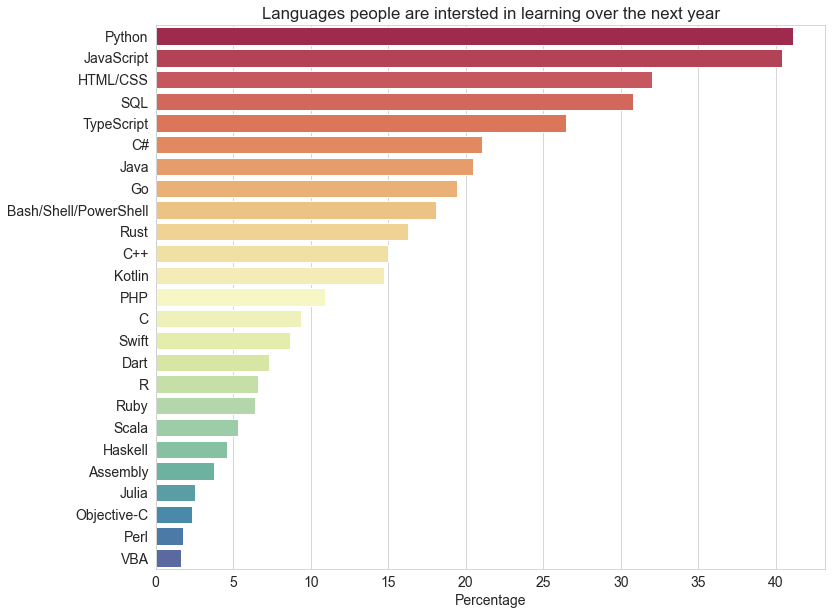

In [90]:
plt.figure(figsize=(12, 10))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index, palette='Spectral')
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('Percentage');

Once again, Python is the language that most people are interested in learning, and I'm coding using Python for this very analysis now!

### The most loved languages

I will try to find the languages that people have used now and want to continue learning & using it over the next year.

To do so, first, I will create a new data frame `languages_loved_df` that contains a `True` value for a language only if the corresponding values in `languages_worked_df` and `languages_interested_df` are both `True`. 

In [85]:
languages_loved_df = languages_worked_df & languages_interested_df

Then, I will take the column-wise sum of `languages_loved_df` and divide it by the column-wise sum of `languages_worked_df` to get the percentage of respondents who "love" the language.

In [87]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

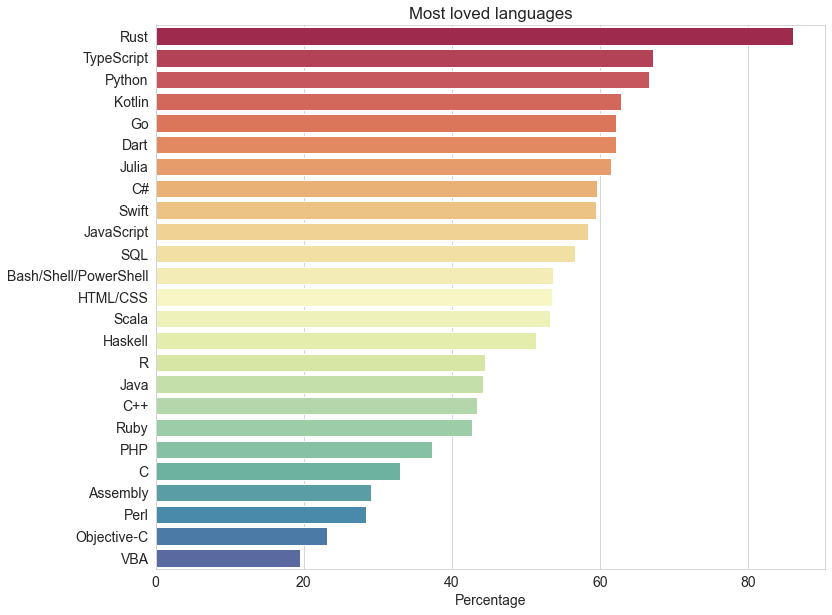

In [92]:
plt.figure(figsize=(12, 10))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index, palette='Spectral')
plt.title("Most loved languages");
plt.xlabel('Percentage');

Rust is the most-loved language. The second most-loved language is TypeScript followed by Python.

### Working hours 

In which countries do developers work the highest number of hours per week? I will the `groupby` operation to aggregate the rows for each country and filter the results to only include the countries with more than 250 respondents.

In [93]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [94]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [95]:
high_response_countries_df 

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


Asian countries like Iran, China, and Israel have the highest working hours, followed by the United States. However, there isn't too much variation overall, and the average working hours seem to be around 40 hours per week.

### Startding age

How important is it to start young to build a career in programming? I will create a scatter plot of `Age` vs. `YearsCodePro` (i.e., years of coding experience) to find the answer.

In [96]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

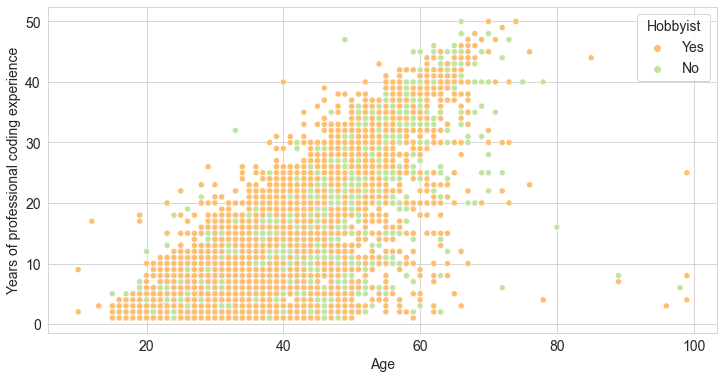

In [99]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df, palette='Spectral')
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

We can see that points all over the graph, indicating that people can **start programming professionally at any age**. Many people who have been coding for several decades professionally also seem to enjoy it as a hobby.

We can also view the distribution of the `Age1stCode` column to see when the respondents tried programming for the first time.

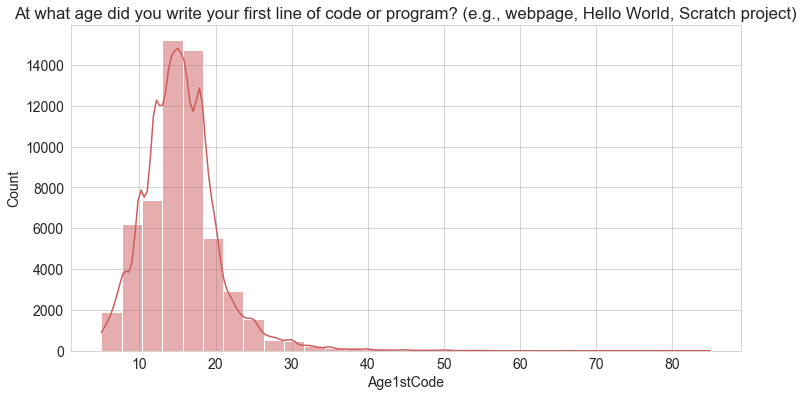

In [102]:
plt.figure(figsize=(12, 6))

plt.title(schema.Age1stCode)
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True, color='indianred');

As you might expect, most people seem to have had some exposure to programming before the age of 40. However, there are people of all ages and walks of life learning to code.

## Employment-related information

### Employment status

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. 

In [66]:
schema.Employment

'Which of the following best describes your current employment status?'

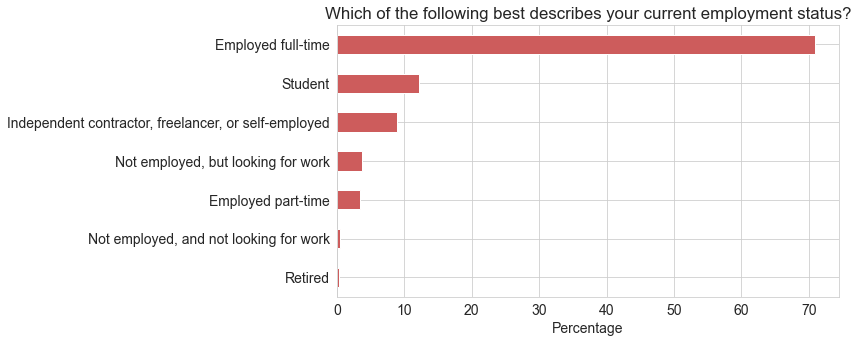

In [67]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='indianred')
plt.title(schema.Employment)
plt.xlabel('Percentage');

It seems that over 70% of respondents are employed full time, no more than 10% of respondents are freelancers, and less than 5% of respondents are employed part time.

### Roles held by respondents

The `DevType` field contains information about the roles held by respondents. 

In [68]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [69]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                               

Similar to the `LanguageWorkedWith` column, respondents were allowed to choose multiple options to `DevType` .

In [71]:
dev_type_df = split_column(survey_df.DevType)

In [72]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [73]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

As one might expect, the most common roles include "Developer" in the name. 